In [2]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [3]:
df = pd.read_csv('apple_data.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
df = df.drop('A_id', axis = 1)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [6]:
df['Quality'].replace({'good':1, 'bad':0}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


In [9]:
df.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [10]:
x = df.drop('Quality', axis = 1)
y = df['Quality']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=10,stratify = y)


In [11]:
x_train.shape

(2800, 7)

y_train.shape

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [13]:
knn_clf.score(x_train, y_train)

0.9228571428571428

In [14]:
knn_clf.score(x_test, y_test)

0.8716666666666667

# Model Evaluation

## without scalling

In [15]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1335   62]
 [ 154 1249]]
**************************************************
Accuracy : 0.9228571428571428
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1397
           1       0.95      0.89      0.92      1403

    accuracy                           0.92      2800
   macro avg       0.92      0.92      0.92      2800
weighted avg       0.92      0.92      0.92      2800



In [16]:
# Testing Data Evaluation

y_pred_test = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[561  38]
 [116 485]]
**************************************************
Accuracy : 0.8716666666666667
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       599
           1       0.93      0.81      0.86       601

    accuracy                           0.87      1200
   macro avg       0.88      0.87      0.87      1200
weighted avg       0.88      0.87      0.87      1200



## with normalization

In [17]:
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=9,p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

## Model Evaluation

In [20]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1445  152]
 [ 125 1478]]
**************************************************
Accuracy : 0.9134375
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1597
           1       0.91      0.92      0.91      1603

    accuracy                           0.91      3200
   macro avg       0.91      0.91      0.91      3200
weighted avg       0.91      0.91      0.91      3200



In [21]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[358  41]
 [ 37 364]]
**************************************************
Accuracy : 0.9025
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       399
           1       0.90      0.91      0.90       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



## Best k_value

Text(0, 0.5, 'Accuracy')

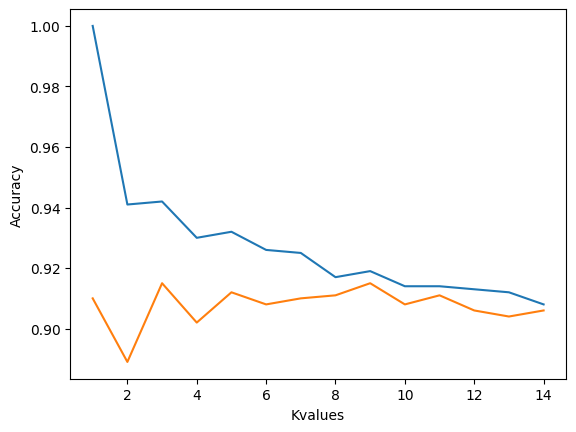

In [22]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

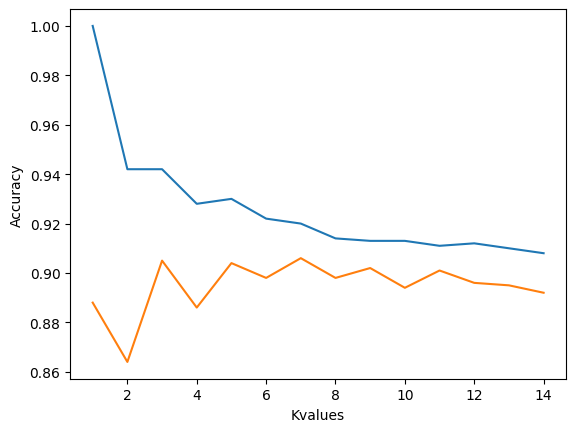

In [23]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # manhattan Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

In [24]:
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)
knn_clf = KNeighborsClassifier(n_neighbors=9,p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1453  144]
 [ 115 1488]]
**************************************************
Accuracy : 0.9190625
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1597
           1       0.91      0.93      0.92      1603

    accuracy                           0.92      3200
   macro avg       0.92      0.92      0.92      3200
weighted avg       0.92      0.92      0.92      3200



In [26]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[357  42]
 [ 26 375]]
**************************************************
Accuracy : 0.915
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       399
           1       0.90      0.94      0.92       401

    accuracy                           0.92       800
   macro avg       0.92      0.91      0.91       800
weighted avg       0.92      0.92      0.91       800



## with standardization scalling

In [27]:
std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x)
df_x = pd.DataFrame(array1, columns= x.columns)

## Model Training

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

## Model Evaluation

In [30]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1544   53]
 [ 170 1433]]
**************************************************
Accuracy : 0.9303125
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1597
           1       0.96      0.89      0.93      1603

    accuracy                           0.93      3200
   macro avg       0.93      0.93      0.93      3200
weighted avg       0.93      0.93      0.93      3200



In [31]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[369  30]
 [ 52 349]]
**************************************************
Accuracy : 0.8975
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       399
           1       0.92      0.87      0.89       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



## Best k_Value

Text(0, 0.5, 'Accuracy')

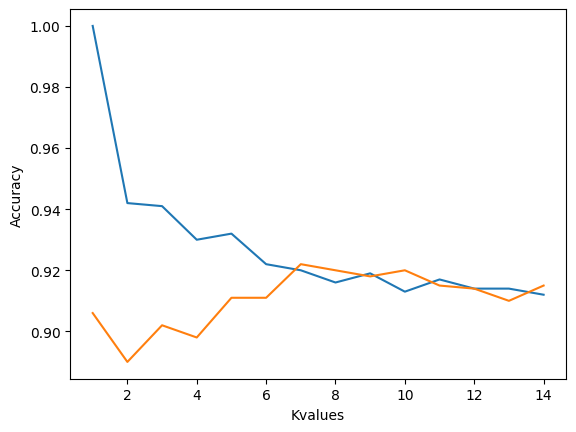

In [32]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

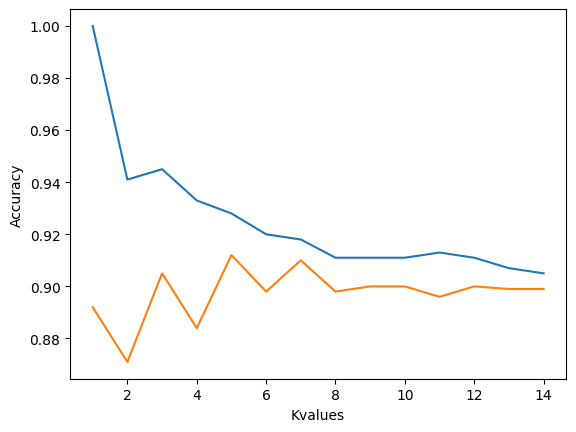

In [33]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # manhattan Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [35]:
knn_clf = KNeighborsClassifier(n_neighbors=7,p=1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [36]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1455  142]
 [ 119 1484]]
**************************************************
Accuracy : 0.9184375
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1597
           1       0.91      0.93      0.92      1603

    accuracy                           0.92      3200
   macro avg       0.92      0.92      0.92      3200
weighted avg       0.92      0.92      0.92      3200



In [37]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[355  44]
 [ 28 373]]
**************************************************
Accuracy : 0.91
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       399
           1       0.89      0.93      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [38]:
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [41]:
with open("knn.pkl", 'wb') as f:
    pickle.dump(knn_clf,f)

### Load Model

In [40]:
with open("knn.pkl", 'rb') as f:
    model = pickle.load(f)